## Problem2

An online car sales platform would like to improve its customer base and their experience by providing them an easy way to buy and sell cars. For this, they would like to have an automated model which can predict the price of the car once the user inputs the required factors. Help the business achieve the objective by applying Lasso and Ridge Regression on it. Please use the below columns for the analysis: Price, Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, Weight.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df= pd.read_csv('ToyotaCorolla (1).csv',encoding = "ISO-8859-1")

In [36]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [37]:
df.drop('Id',axis=1,inplace=True)

In [38]:
df.shape

(1436, 37)

In [39]:
df.columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [40]:
df.dtypes

Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
d

In [41]:
df.describe(exclude = ["number"])

,Model,Fuel_Type,Color
count,1436,1436,1436
unique,372,3,10
top,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,Petrol,Grey
freq,107,1264,301


In [42]:
df.select_dtypes(include=["object"])

,Model,Fuel_Type,Color
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Silver
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Black
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,Diesel,Black
...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,Petrol,Blue
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Grey
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Blue
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Grey


In [43]:
from sklearn.preprocessing import LabelEncoder
# define one hot encoding
encoder = LabelEncoder()
# transform data
df['Model']= encoder.fit_transform(df.Model)
df['Fuel_Type']= encoder.fit_transform(df.Fuel_Type)
df['Color']= encoder.fit_transform(df.Color)

In [44]:
df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,257,13500,23,10,2002,46986,1,90,1,2,...,1,1,1,0,0,0,1,0,0,0
1,257,13750,23,10,2002,72937,1,90,1,6,...,1,0,1,0,0,0,1,0,0,0
2,365,13950,24,9,2002,41711,1,90,1,2,...,0,0,1,0,0,0,1,0,0,0
3,257,14950,26,7,2002,48000,1,90,0,1,...,0,0,1,0,0,0,1,0,0,0
4,256,13750,30,3,2002,38500,1,90,0,1,...,1,1,1,0,1,0,1,0,0,0


In [45]:
df.Mfg_Year.value_counts()

1999    441
1998    392
2000    225
2001    192
2002     87
2003     75
2004     24
Name: Mfg_Year, dtype: int64

In [46]:
df.dtypes

Model               int32
Price               int64
Age_08_04           int64
Mfg_Month           int64
Mfg_Year            int64
KM                  int64
Fuel_Type           int32
HP                  int64
Met_Color           int64
Color               int32
Automatic           int64
cc                  int64
Doors               int64
Cylinders           int64
Gears               int64
Quarterly_Tax       int64
Weight              int64
Mfr_Guarantee       int64
BOVAG_Guarantee     int64
Guarantee_Period    int64
ABS                 int64
Airbag_1            int64
Airbag_2            int64
Airco               int64
Automatic_airco     int64
Boardcomputer       int64
CD_Player           int64
Central_Lock        int64
Powered_Windows     int64
Power_Steering      int64
Radio               int64
Mistlamps           int64
Sport_Model         int64
Backseat_Divider    int64
Metallic_Rim        int64
Radio_cassette      int64
Tow_Bar             int64
dtype: object

In [47]:
df[df.duplicated()]

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


<AxesSubplot:>

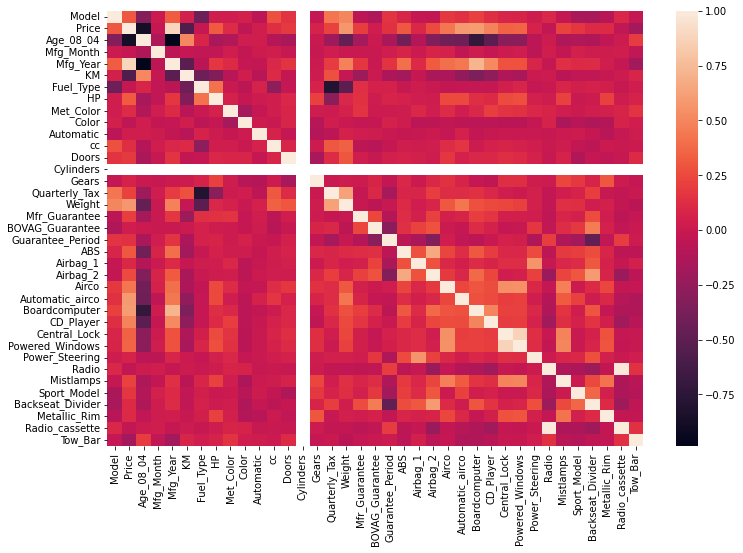

In [48]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.heatmap(df.corr(), annot=False)

Radio and radio cassette are highly correlated. 
central lock and power windows are highly correlated. 

In [49]:
df.drop('Radio_cassette',axis=1,inplace=True)

In [50]:
# Sctter plot and histogram between variables
#sns.pairplot(df) # no multicolinearity issue

In [51]:
df[df.columns.drop('Price')]

,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar
0,257,23,10,2002,46986,1,90,1,2,0,...,0,1,1,1,0,0,0,1,0,0
1,257,23,10,2002,72937,1,90,1,6,0,...,1,1,0,1,0,0,0,1,0,0
2,365,24,9,2002,41711,1,90,1,2,0,...,0,0,0,1,0,0,0,1,0,0
3,257,26,7,2002,48000,1,90,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,256,30,3,2002,38500,1,90,0,1,0,...,0,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,5,69,12,1998,20544,2,86,1,2,0,...,0,1,1,1,0,1,1,1,0,0
1432,8,72,9,1998,19000,2,86,0,4,0,...,0,0,0,1,0,0,1,1,0,0
1433,8,71,10,1998,17016,2,86,0,2,0,...,0,0,0,1,0,0,0,1,0,0
1434,8,70,11,1998,16916,2,86,1,4,0,...,0,0,0,0,0,0,0,1,0,0


## Train Test split

In [53]:
X=df[df.columns.drop('Price')] ## independent features
y=df['Price'] ## dependent features

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
X_train.shape

(1148, 35)

In [56]:
X_test.shape

(288, 35)

In [57]:
y_test.shape

(288,)

## Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)

In [59]:
X_train_scaled .shape

(1148, 35)

## Linear Regression


In [60]:
#without cross validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = LinearRegression()
results = model.fit(X_train_scaled,y_train)
   
# predicting the test set results
y_pred = model.predict(X_train_scaled)

print('r2_score = ',r2_score(y_train, y_pred))
print('mean_squared_error = ',mean_squared_error(y_train, y_pred))

r2_score =  0.9173893250806971
mean_squared_error =  1100545.540559669


In [62]:
X_test_scaled = scaler.fit_transform(X_test)
results = model.fit(X_test_scaled,y_test)
# predicting the test set results
y_pred = model.predict(X_test_scaled)
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_squared_error = ',mean_squared_error(y_test, y_pred))

r2_score =  0.8976057188385508
mean_squared_error =  1274019.2682291667


In [63]:
#with cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
rsquare=cross_val_score(lin_regressor,X_train_scaled,y_train,cv=5,scoring='r2')
rmse=cross_val_score(lin_regressor,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
mean_rsquare=np.mean(rsquare)
mean_rmse=-np.mean(rmse)
print('mean_rsquare = ',mean_rsquare)
print('mean_rmse = ',mean_rmse)

mean_rsquare =  0.9000965436132097
mean_rmse =  1286269.651749217


In [65]:
results = lin_regressor.fit(X_test_scaled,y_test)
y_pred = lin_regressor.predict(X_test_scaled)
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_squared_error = ',mean_squared_error(y_test, y_pred))

r2_score =  0.8976057188385508
mean_squared_error =  1274019.2682291667


## Ridge Regression

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5,scoring='r2')
ridge_regressor.fit(X_train_scaled,y_train)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.79751e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.94354e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [67]:
print('best param = ',ridge_regressor.best_params_)
print('mean_rsquare = ',ridge_regressor.best_score_)

best param =  {'alpha': 1}
mean_rsquare =  0.9033194944874243


In [68]:
results = ridge_regressor.fit(X_test_scaled,y_test)
y_pred = ridge_regressor.predict(X_test_scaled)
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_squared_error = ',mean_squared_error(y_test, y_pred))

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.24103e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.21815e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.18736e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.16876e-18): result may not be accurate.

r2_score =  0.8938033646202193
mean_squared_error =  1321329.2594106933


## Lasso Regression

In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5,scoring='r2')

lasso_regressor.fit(X_train_scaled,y_train)
print('best param = ',lasso_regressor.best_params_)
print('mean_rsquare = ',lasso_regressor.best_score_)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.824e+08, tolerance: 1.273e+06
  model = cd_fast.enet_coordinate_descent(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+08, tolerance: 1.241e+06
  model = cd_fast.enet_coordinate_descent(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

best param =  {'alpha': 1}
mean_rsquare =  0.90028930951062


In [70]:
results = lasso_regressor.fit(X_test_scaled,y_test)
y_pred = lasso_regressor.predict(X_test_scaled)
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_squared_error = ',mean_squared_error(y_test, y_pred))

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.272e+08, tolerance: 3.022e+05
  model = cd_fast.enet_coordinate_descent(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+08, tolerance: 2.927e+05
  model = cd_fast.enet_coordinate_descent(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

r2_score =  0.8909332650754606
mean_squared_error =  1357039.86824824


We dont see any improvement in the above dataset using lasso or ridge